# Data analytics project

This research analyses the annual number of overnight trips and nights spent by foreign visitors, while investigating the correlation between these two factors. 

## Exploratory Data Analysis

Importing essential libraries that provide the tools necessary for data manipulation, statistical analysis, and visualization.
EDA involves summarizing the main characteristics of the dataset using statistical and visualization techniques. 

### Exploring the dataset

In [112]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

#importing fuctions from a ipynb
%run utilss.ipynb

#To read the file downloaded from the CSO.ie database
df = pd.read_csv('cso_data.csv', index_col=False)

In [113]:
#To get all the information realted to the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          600 non-null    object 
 1   Month                    600 non-null    object 
 2   Main Accommodation Type  600 non-null    object 
 3   UNIT                     600 non-null    object 
 4   VALUE                    600 non-null    float64
dtypes: float64(1), object(4)
memory usage: 23.6+ KB


In [114]:
#Shows the 5 first rows from the dataset
df.head()

,Statistic Label,Month,Main Accommodation Type,UNIT,VALUE
0,Number of Overnight Trips by Foreign Visitors,2023 January,Hotel/conference centre,Thousand,121.0
1,Number of Overnight Trips by Foreign Visitors,2023 January,Guest house/bed & breakfast,Thousand,8.5
2,Number of Overnight Trips by Foreign Visitors,2023 January,Friends/relatives/own property,Thousand,243.4
3,Number of Overnight Trips by Foreign Visitors,2023 January,Self catering/rented house,Thousand,13.8
4,Number of Overnight Trips by Foreign Visitors,2023 January,Other private tourism accommodation n.e.c.,Thousand,13.4


In [115]:
#To drop the feature Statistic Label
df = df.drop(columns=['Statistic Label'])

### Reorganazing the dataset

Reorganizing the dataset by creating new columns and assigning values from the existing `VALUE` column into these new features.


In [116]:
#Creates 5 new columns and asigned values from VALUE into the new features 
df['Number of Overnight Trips by Foreign Visitors (Thousand)'] = pd.Series(df['VALUE'].iloc[0:120].reset_index(drop=True))
df['Percentage of Overnight Trips by Foreign Visitors (%)'] = pd.Series(df['VALUE'].iloc[120:240].reset_index(drop=True))
df['Number of Nights by Foreign Visitors (Thousand)'] = pd.Series(df['VALUE'].iloc[240:360].reset_index(drop=True))
df['Percentage of Nights by Foreign Visitors (%)'] = pd.Series(df['VALUE'].iloc[360:480].reset_index(drop=True))
df['Average Length of Stay of Foreign Visitors (Nights per trip)'] = pd.Series(df['VALUE'].iloc[480:600].reset_index(drop=True))


In [117]:
df.head(120)

,Month,Main Accommodation Type,UNIT,VALUE,Number of Overnight Trips by Foreign Visitors (Thousand),Percentage of Overnight Trips by Foreign Visitors (%),Number of Nights by Foreign Visitors (Thousand),Percentage of Nights by Foreign Visitors (%),Average Length of Stay of Foreign Visitors (Nights per trip)
0,2023 January,Hotel/conference centre,Thousand,121.0,121.0,30.3,441.9,12.0,3.7
1,2023 January,Guest house/bed & breakfast,Thousand,8.5,8.5,2.1,55.9,1.5,6.6
2,2023 January,Friends/relatives/own property,Thousand,243.4,243.4,60.8,2701.9,73.1,11.1
3,2023 January,Self catering/rented house,Thousand,13.8,13.8,3.4,154.8,4.2,11.2
4,2023 January,Other private tourism accommodation n.e.c.,Thousand,13.4,13.4,3.3,341.6,9.2,25.5
...,...,...,...,...,...,...,...,...,...
115,2024 August,Guest house/bed & breakfast,Thousand,62.9,62.9,8.2,559.3,8.4,8.9
116,2024 August,Friends/relatives/own property,Thousand,290.9,290.9,38.1,2958.5,44.4,10.2
117,2024 August,Self catering/rented house,Thousand,43.3,43.3,5.7,483.7,7.3,11.2
118,2024 August,Other private tourism accommodation n.e.c.,Thousand,68.0,68.0,8.9,920.8,13.8,13.5


In [118]:
#To drop features VALUE and UNIT
df = df.drop(columns=['VALUE', 'UNIT'])
#To drop all the observations after index 120
df = df.drop(df.index[120:])

In [119]:
df.head(125)

,Month,Main Accommodation Type,Number of Overnight Trips by Foreign Visitors (Thousand),Percentage of Overnight Trips by Foreign Visitors (%),Number of Nights by Foreign Visitors (Thousand),Percentage of Nights by Foreign Visitors (%),Average Length of Stay of Foreign Visitors (Nights per trip)
0,2023 January,Hotel/conference centre,121.0,30.3,441.9,12.0,3.7
1,2023 January,Guest house/bed & breakfast,8.5,2.1,55.9,1.5,6.6
2,2023 January,Friends/relatives/own property,243.4,60.8,2701.9,73.1,11.1
3,2023 January,Self catering/rented house,13.8,3.4,154.8,4.2,11.2
4,2023 January,Other private tourism accommodation n.e.c.,13.4,3.3,341.6,9.2,25.5
...,...,...,...,...,...,...,...
115,2024 August,Guest house/bed & breakfast,62.9,8.2,559.3,8.4,8.9
116,2024 August,Friends/relatives/own property,290.9,38.1,2958.5,44.4,10.2
117,2024 August,Self catering/rented house,43.3,5.7,483.7,7.3,11.2
118,2024 August,Other private tourism accommodation n.e.c.,68.0,8.9,920.8,13.8,13.5


In [120]:
#to split the feature "Month" into "Month" and "Year"
df[['Year', 'Month']] = df['Month'].str.split(' ', expand=True)

#To change Year's datatype  
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

In [121]:
df.head()

,Month,Main Accommodation Type,Number of Overnight Trips by Foreign Visitors (Thousand),Percentage of Overnight Trips by Foreign Visitors (%),Number of Nights by Foreign Visitors (Thousand),Percentage of Nights by Foreign Visitors (%),Average Length of Stay of Foreign Visitors (Nights per trip),Year
0,January,Hotel/conference centre,121.0,30.3,441.9,12.0,3.7,2023
1,January,Guest house/bed & breakfast,8.5,2.1,55.9,1.5,6.6,2023
2,January,Friends/relatives/own property,243.4,60.8,2701.9,73.1,11.1,2023
3,January,Self catering/rented house,13.8,3.4,154.8,4.2,11.2,2023
4,January,Other private tourism accommodation n.e.c.,13.4,3.3,341.6,9.2,25.5,2023


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Month                                                         120 non-null    object 
 1   Main Accommodation Type                                       120 non-null    object 
 2   Number of Overnight Trips by Foreign Visitors (Thousand)      120 non-null    float64
 3   Percentage of Overnight Trips by Foreign Visitors (%)         120 non-null    float64
 4   Number of Nights by Foreign Visitors (Thousand)               120 non-null    float64
 5   Percentage of Nights by Foreign Visitors (%)                  120 non-null    float64
 6   Average Length of Stay of Foreign Visitors (Nights per trip)  120 non-null    float64
 7   Year                                                          120 non-nu

In [123]:
df.describe()

,Number of Overnight Trips by Foreign Visitors (Thousand),Percentage of Overnight Trips by Foreign Visitors (%),Number of Nights by Foreign Visitors (Thousand),Percentage of Nights by Foreign Visitors (%),Average Length of Stay of Foreign Visitors (Nights per trip),Year
count,120.000000,120.000000,120.00000,120.000000,120.00000,120.000000
mean,182.068333,33.334167,1425.00000,33.332500,10.04750,2023.400000
std,194.450136,34.420437,1540.59099,33.579368,6.67257,0.491952
min,7.100000,2.100000,45.30000,1.500000,3.30000,2023.000000
25%,26.850000,5.075000,333.37500,7.850000,6.37500,2023.000000
50%,95.900000,20.550000,811.20000,19.650000,8.15000,2023.000000
75%,266.700000,46.125000,1785.32500,44.600000,11.60000,2024.000000
max,763.600000,100.000000,7337.70000,100.000000,56.00000,2024.000000


In [124]:
#To drop redundant observations
print(f"Set size before dropping redundant observations: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Set size after dropping redundant observations: {df.shape}")


Set size before dropping redundant observations: (120, 8)
Set size after dropping redundant observations: (120, 8)


In [125]:
#to create the csv of the modified dataset
df.to_csv('new_cso_data.csv', index=False)

### Distribution

Distribution of the key variables in the dataset to identify patterns, trends, and potential outliers that could impact the analysis.

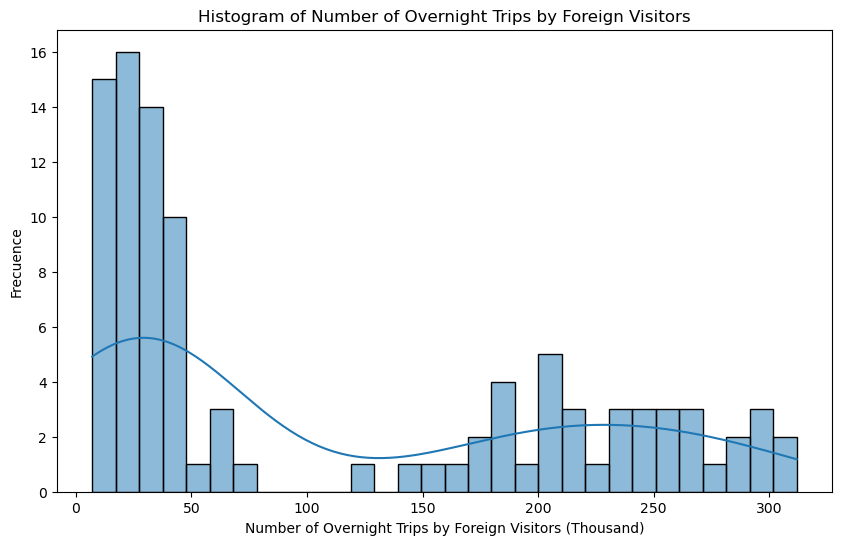

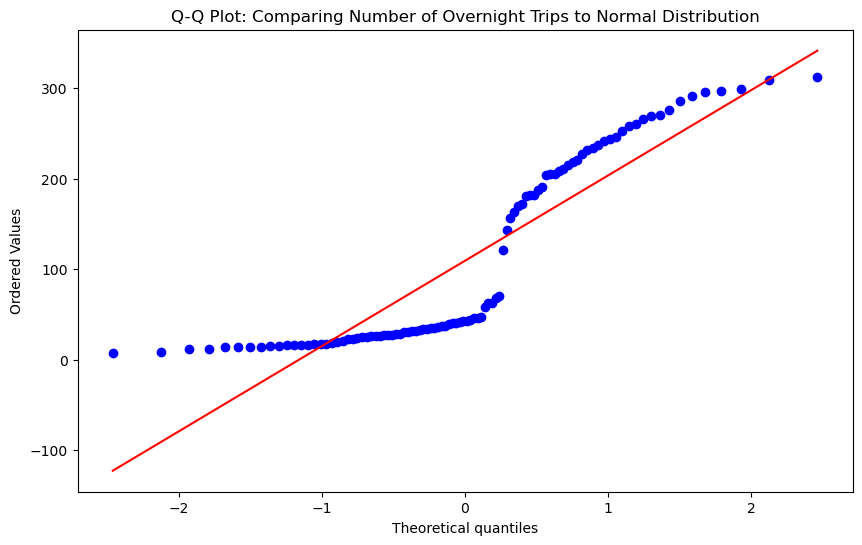

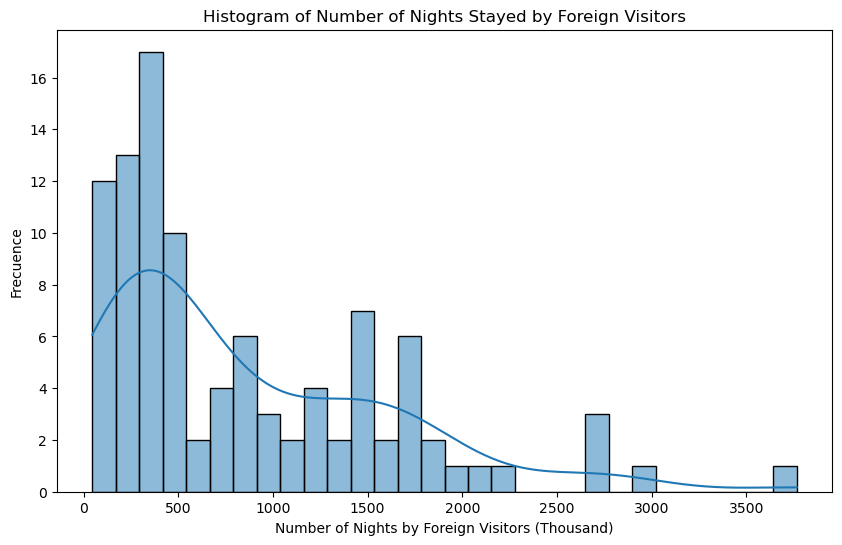

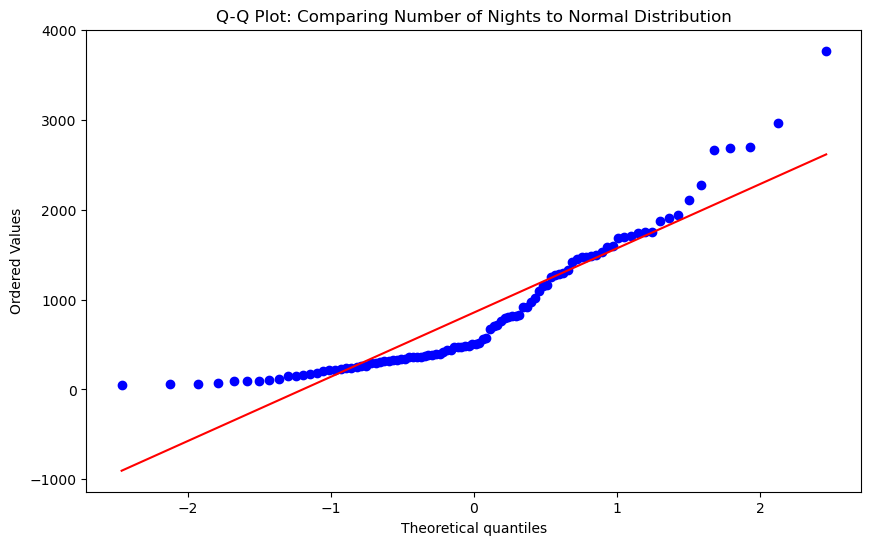

In [126]:
#To call the function to filter the data by excluding the feature: "All types of accommodation"
df_filtered = load_filter_data('new_cso_data.csv', 'All types of accommodation')

#To verify the distribution, creates an histogram and a Q-Q plot of Number of overnight trips and Number of nights stayed
feature = 'Number of Overnight Trips by Foreign Visitors (Thousand)'
data = df_filtered[feature].values

#Creates a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True)
plt.title('Histogram of Number of Overnight Trips by Foreign Visitors')
plt.xlabel(feature)
plt.ylabel('Frecuence')
plt.show()

# Creates a Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot: Comparing Number of Overnight Trips to Normal Distribution')
plt.show()


feature2 = 'Number of Nights by Foreign Visitors (Thousand)'
data2 = df_filtered[feature2].values

#Creates a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data2, bins=30, kde=True)
plt.title('Histogram of Number of Nights Stayed by Foreign Visitors')
plt.xlabel(feature2)
plt.ylabel('Frecuence')
plt.show()

# Creates a Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(data2, dist="norm", plot=plt)
plt.title('Q-Q Plot: Comparing Number of Nights to Normal Distribution')
plt.show()


In [127]:
#To split the dataset into groups by year
by_year = df_filtered.groupby('Year')

#Shapiro-Wilk test by year to get a statistical confirmation of the distribution
shapiro_results_overnights= {}
print('Number of Overnight Trips by Foreign Visitors (Thousand)')
for year, group in by_year:
    stat, p_value= shapiro(group['Number of Overnight Trips by Foreign Visitors (Thousand)'])
    shapiro_results_overnights[year]= {'Statistics': stat, 'p-value': p_value}

#Loop to show results by year
for year, result in shapiro_results_overnights.items():
    print(f"Year: {year}, Shapiro-Wilk Test: Statistics={result['Statistics']}, p-value={result['p-value']}")


shapiro_results_nights= {}
print('\nNumber of Nights by Foreign Visitors (Thousand)')
for year, group in by_year:
    stat, p_value= shapiro(group['Number of Nights by Foreign Visitors (Thousand)'])
    shapiro_results_nights[year]= {'Statistics': stat, 'p-value': p_value}

#Loop to show results by year
for year, result in shapiro_results_nights.items():
    print(f"Year: {year}, Shapiro-Wilk Test: Statistics={result['Statistics']}, p-value={result['p-value']}")



Number of Overnight Trips by Foreign Visitors (Thousand)
Year: 2023, Shapiro-Wilk Test: Statistics=0.7943445236191108, p-value=9.786312382023767e-08
Year: 2024, Shapiro-Wilk Test: Statistics=0.8056541346472592, p-value=8.905279815296568e-06

Number of Nights by Foreign Visitors (Thousand)
Year: 2023, Shapiro-Wilk Test: Statistics=0.8454348148030089, p-value=2.239924805800112e-06
Year: 2024, Shapiro-Wilk Test: Statistics=0.8703441633009102, p-value=0.00029201577720950787


### Outlier detection

Identifying and removing outliers to ensure the accuracy of the analysis

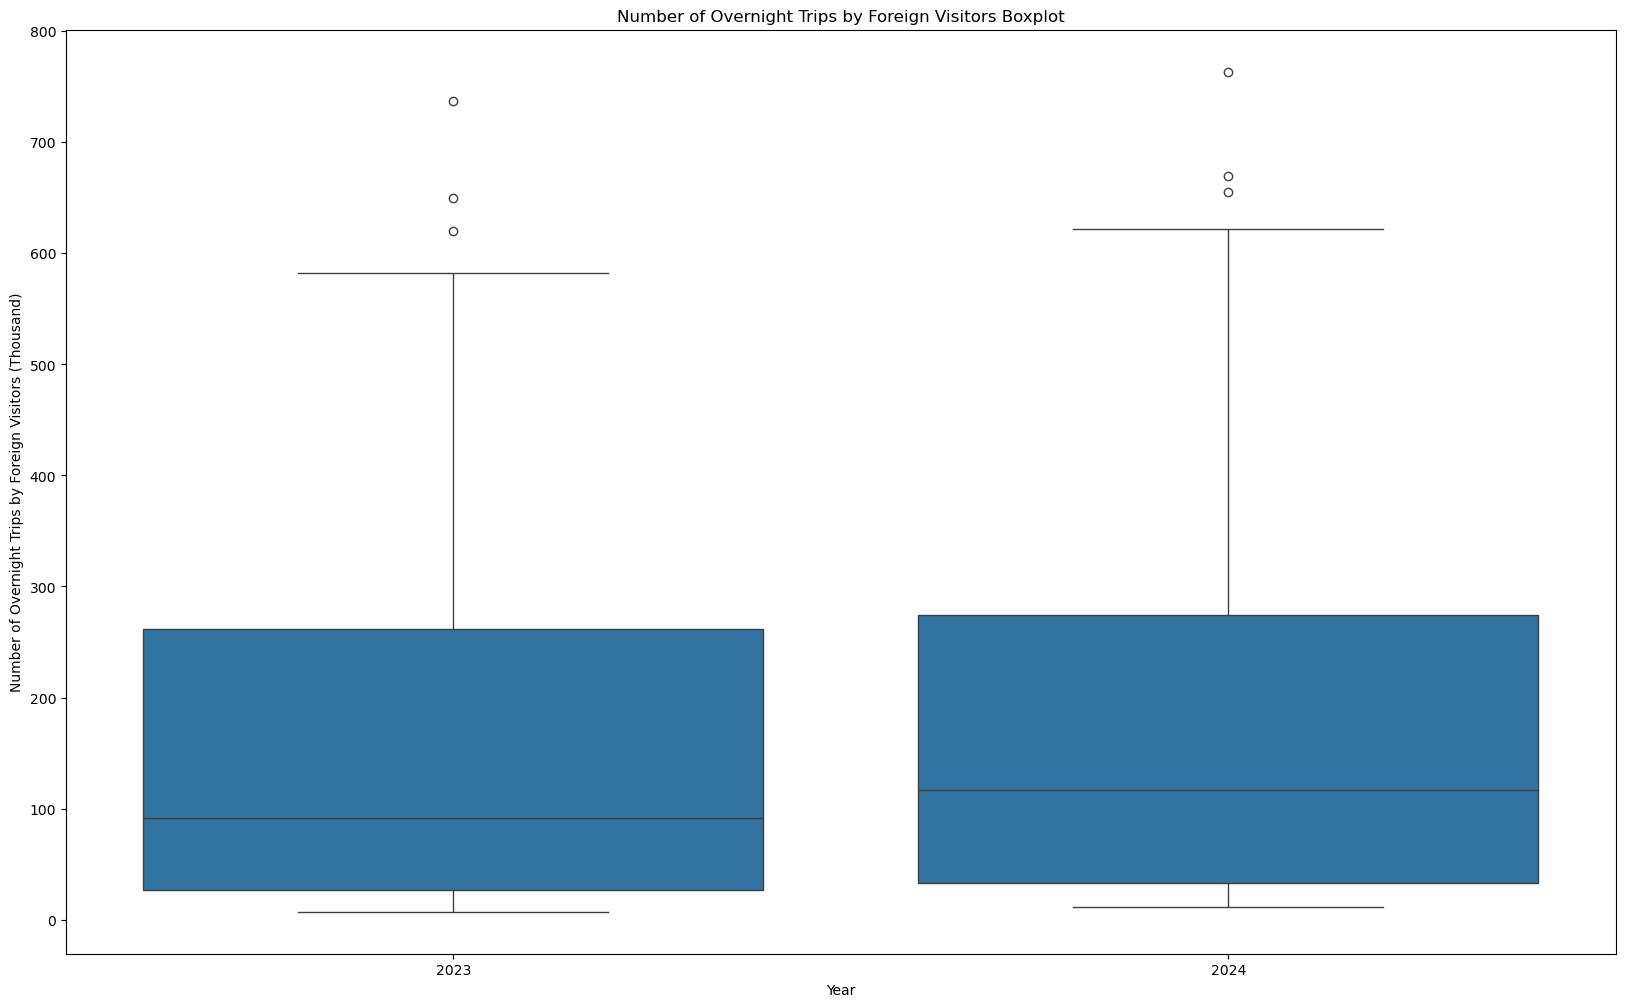

In [128]:
#Creates a boxplot for each year to visualize outliers
plt.figure(figsize=(20, 12))
sns.boxplot(x='Year', y='Number of Overnight Trips by Foreign Visitors (Thousand)', data=df)
plt.title('Number of Overnight Trips by Foreign Visitors Boxplot')
plt.xlabel('Year')
plt.ylabel('Number of Overnight Trips by Foreign Visitors (Thousand)')
plt.show()

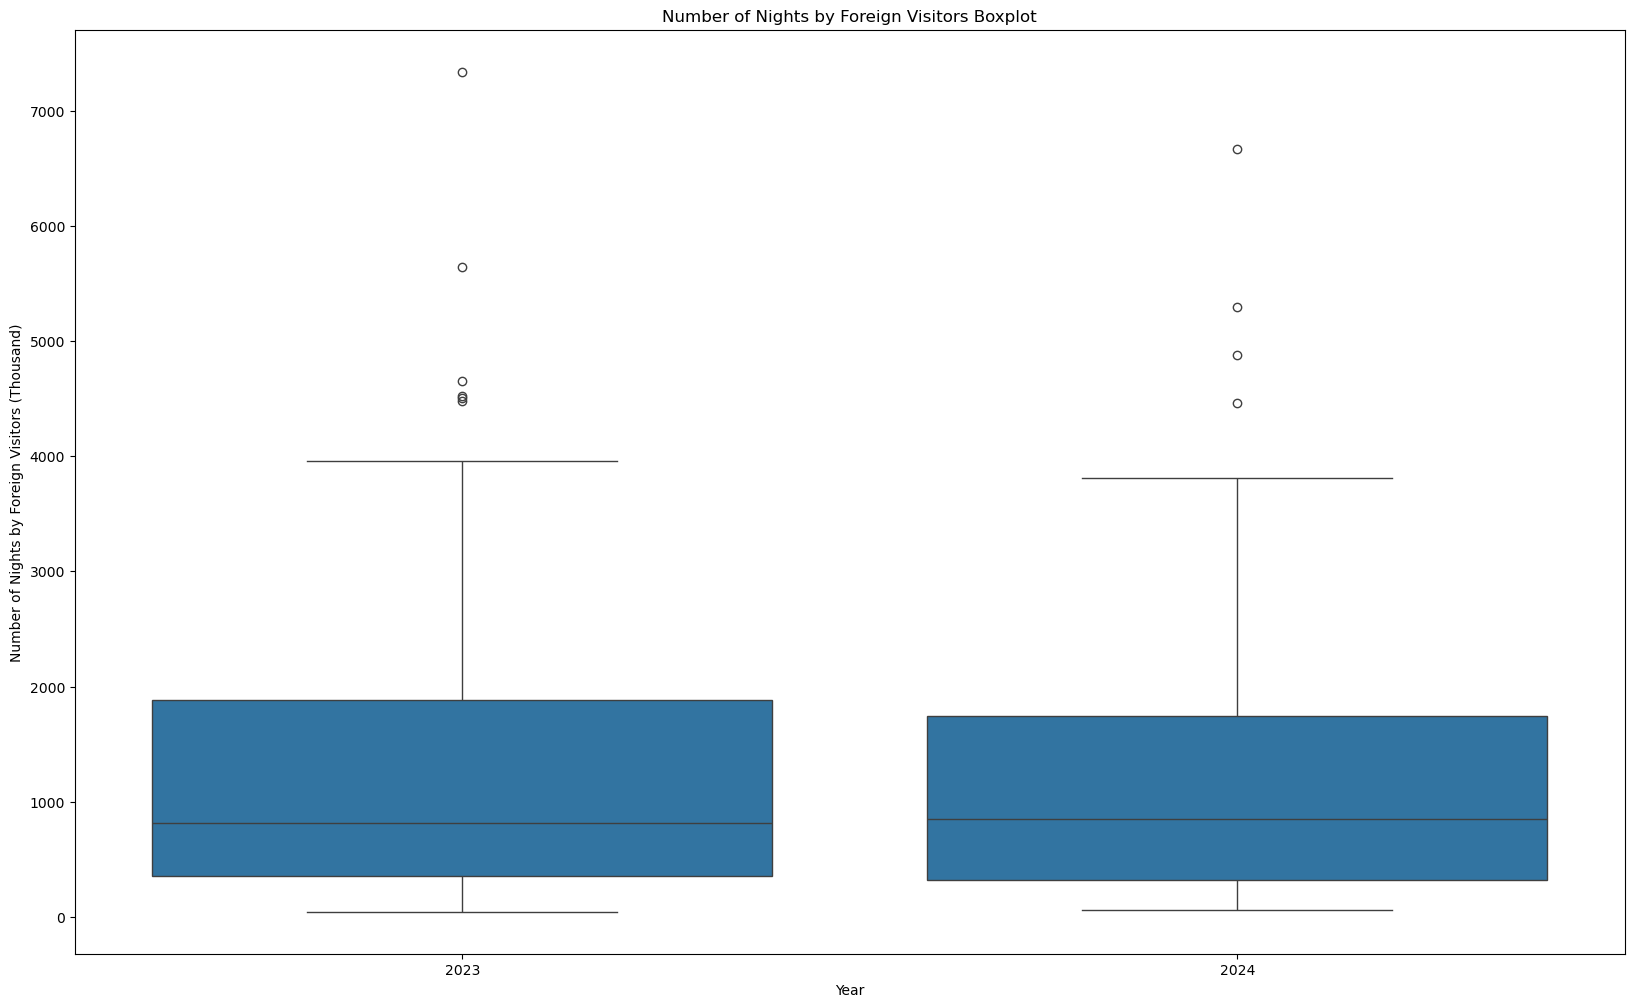

In [134]:
#Creates a boxplot for each year to visualize outliers
plt.figure(figsize=(20, 12))
sns.boxplot(x='Year', y='Number of Nights by Foreign Visitors (Thousand)', data=df)
plt.title('Number of Nights by Foreign Visitors Boxplot')
plt.xlabel('Year')
plt.ylabel('Number of Nights by Foreign Visitors (Thousand)')
plt.show()

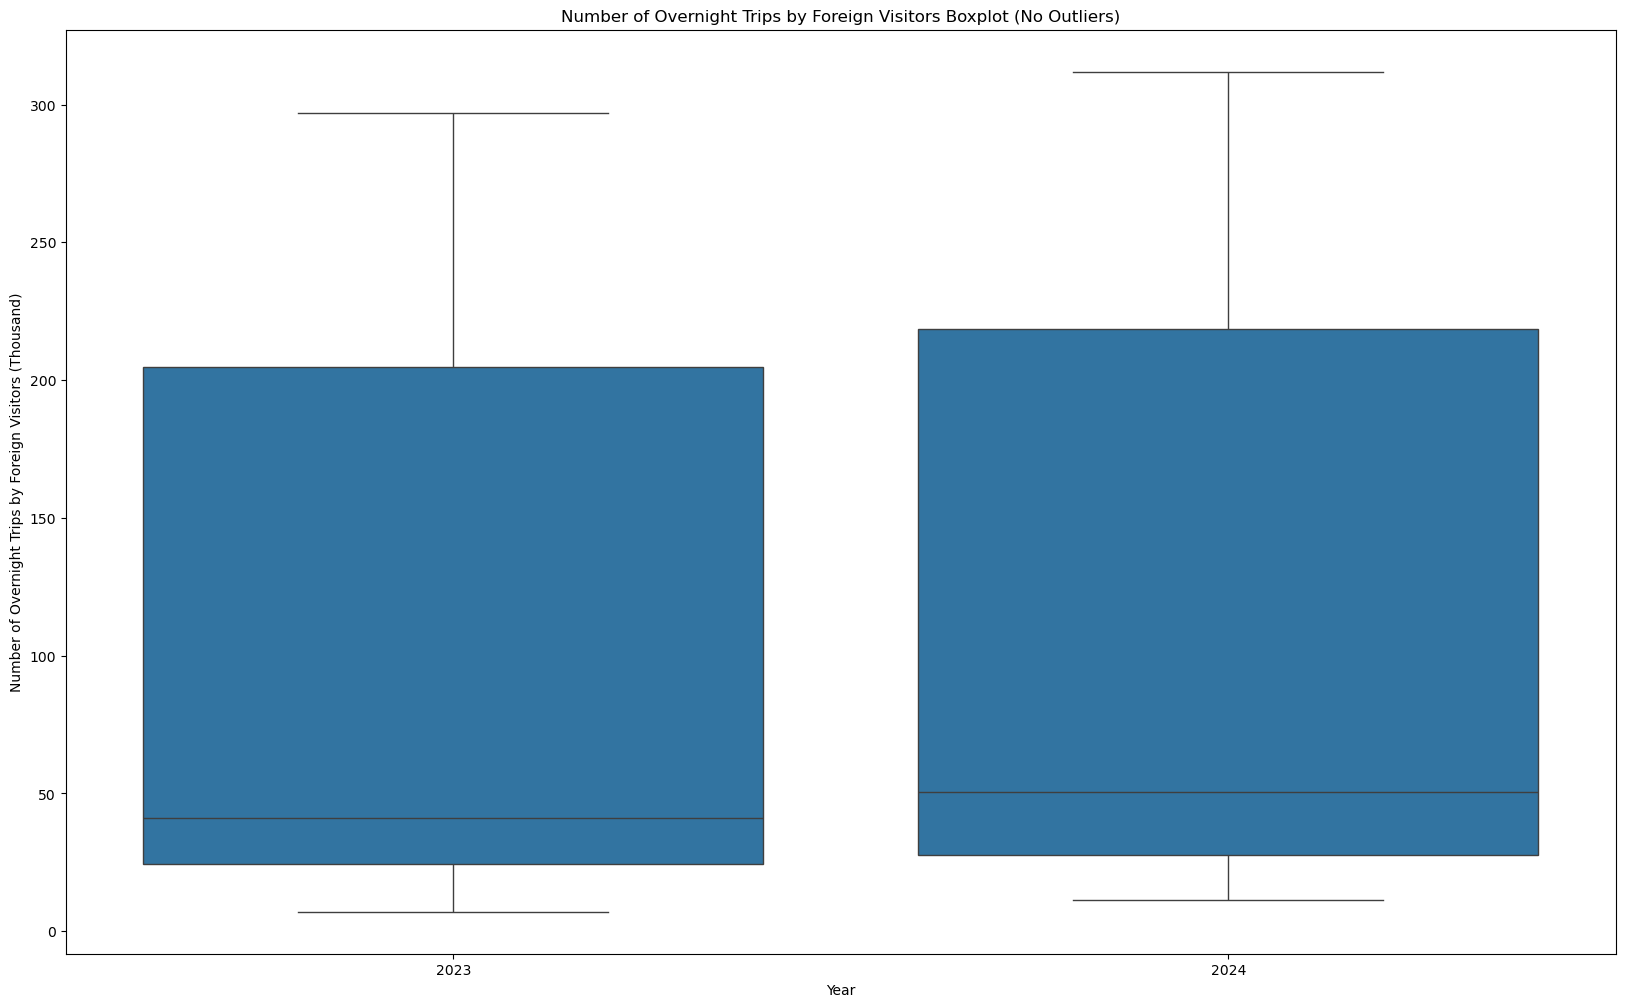

In [135]:
#To calculate outliers with the function calculate_iqr
outliers = calculate_iqr(df_filtered, 'Number of Overnight Trips by Foreign Visitors (Thousand)')
#To delete outliers
df_no_outliers = df_filtered[~df_filtered.index.isin(outliers.index)]

#Creates boxplot with no outliers
plt.figure(figsize=(20, 12))
sns.boxplot(x='Year', y='Number of Overnight Trips by Foreign Visitors (Thousand)', data=df_no_outliers)
plt.title('Number of Overnight Trips by Foreign Visitors Boxplot (No Outliers)')
plt.xlabel('Year')
plt.ylabel('Number of Overnight Trips by Foreign Visitors (Thousand)')
plt.show()

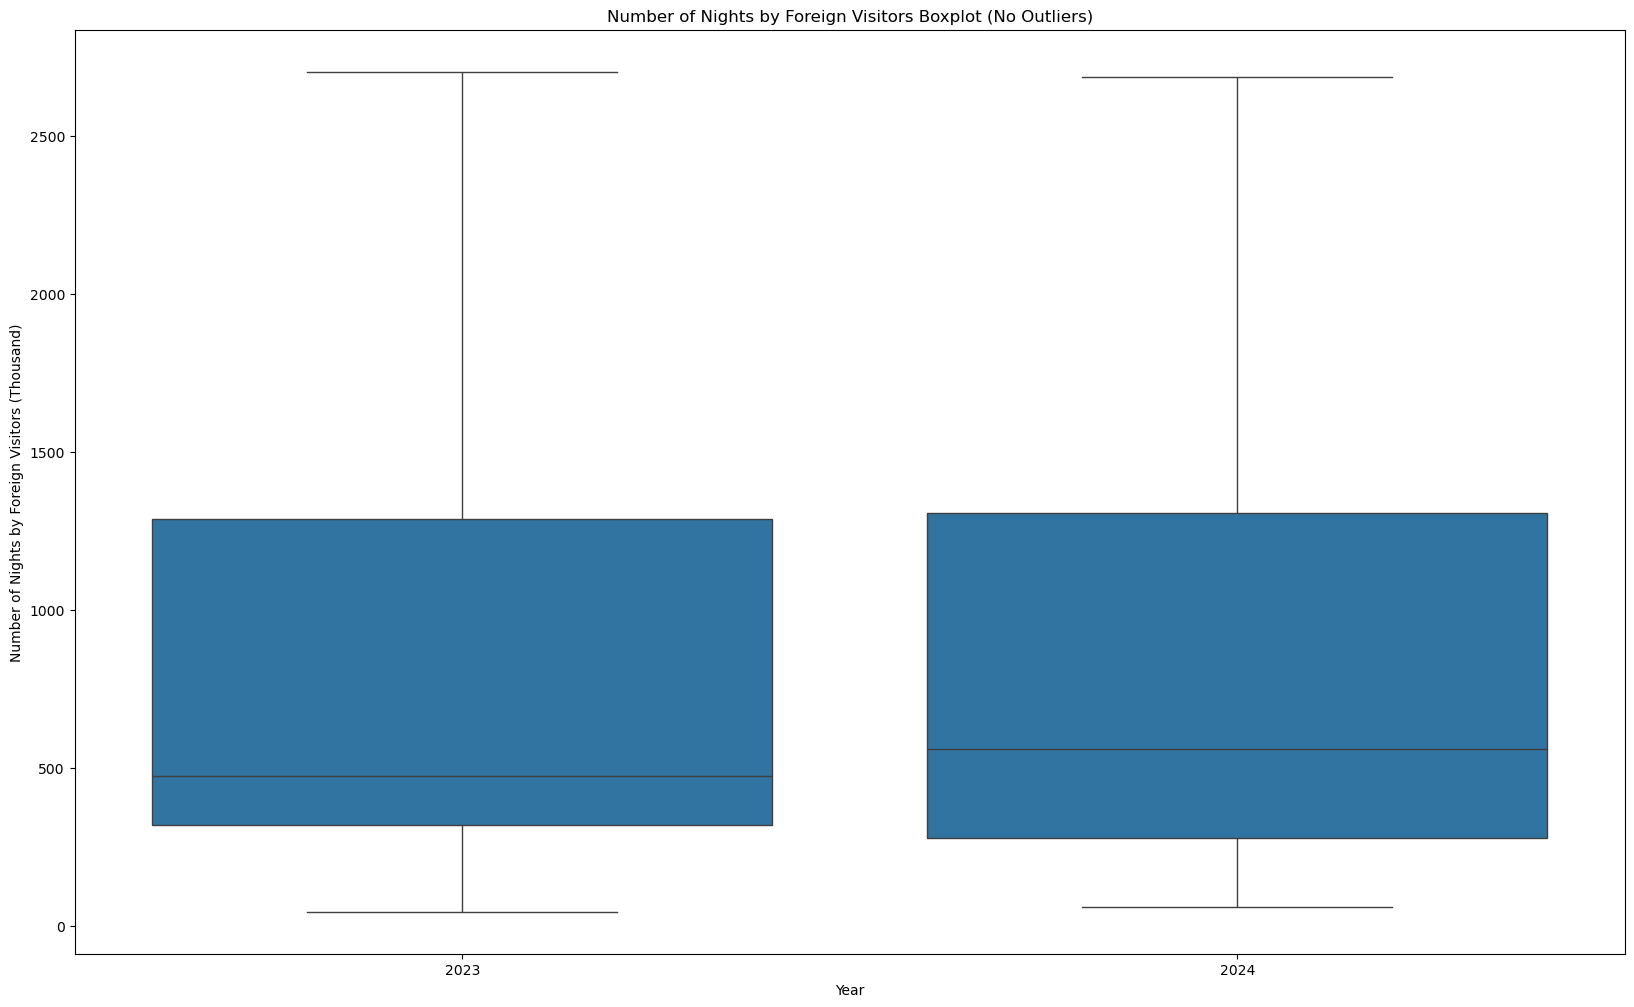

In [136]:
#To calculate outliers with the function calculate_iqr
outliers = calculate_iqr(df_filtered, 'Number of Nights by Foreign Visitors (Thousand)')
#To delete outliers
df_no_outliers = df_filtered[~df_filtered.index.isin(outliers.index)]

#Creates boxplot with no outliers
plt.figure(figsize=(20, 12))
sns.boxplot(x='Year', y='Number of Nights by Foreign Visitors (Thousand)', data=df_no_outliers)
plt.title('Number of Nights by Foreign Visitors Boxplot (No Outliers)')
plt.xlabel('Year')
plt.ylabel('Number of Nights by Foreign Visitors (Thousand)')
plt.show()

In [130]:
#Removing outliers
#grouping data by year
by_year = df_filtered.groupby('Year')

#creates dictionaries to store results
outliers_trips_dict = {}
outliers_nights_dict = {}

#calling the funtion calculate_iqr 
for name, group in by_year:
    outliers_trips = calculate_iqr(group, 'Number of Overnight Trips by Foreign Visitors (Thousand)')
    outliers_nights = calculate_iqr(group, 'Number of Nights by Foreign Visitors (Thousand)')
    
    #storing result in dictionaries
    outliers_trips_dict[name] = outliers_trips
    outliers_nights_dict[name] = outliers_nights

#coverting dictionaries into dataframes
outliers_trips_df = pd.concat(outliers_trips_dict)
outliers_nights_df = pd.concat(outliers_nights_dict)

#To show DataFrames
display(outliers_trips_df)
display(outliers_nights_df)

,,Number of Overnight Trips by Foreign Visitors (Thousand),Number of Nights by Foreign Visitors (Thousand)


,,Number of Overnight Trips by Foreign Visitors (Thousand),Number of Nights by Foreign Visitors (Thousand)
2023,37,295.9,3767.2
2024,97,290.9,2958.5


In [133]:
#To compare the std original and after the quartiles method
#For Number of Overnight Trips
print('Number of Overnight Trips by Foreign Visitors')
orig_std = df['Number of Overnight Trips by Foreign Visitors (Thousand)'].std()
processed_std = df_no_outliers ['Number of Overnight Trips by Foreign Visitors (Thousand)'].std()

print(f"Original std: {orig_std}")
print(f"No outliers std: {processed_std}")

#For Number of Nights
print('\nNumber of Nights by Foreign Visitors')
orig_std2 = df['Number of Nights by Foreign Visitors (Thousand)'].std()
processed_std2 = outliers_nights_df ['Number of Nights by Foreign Visitors (Thousand)'].std()

print(f"Original std: {orig_std2}")
print(f"No outliers std: {processed_std2}")

Number of Overnight Trips by Foreign Visitors
Original std: 194.45013617733406
No outliers std: 103.08280382510192

Number of Nights by Foreign Visitors
Original std: 1540.5909896240876
No outliers std: 571.8372539455609
